*Hello* Everyone ! 
This is the Intro to Sckit-learn workshop
Here we will learn how to train Machine Learning Models in scikit-learn while using libraries like pandas,numpy and matplotlib 

Today we will be learning about various machine learning algorithms - SVM,KNN,LogisticRegression, LinearRegression and we will be applying them to a bunch of datasets.

In addition to this I will be providing you with a bunch of helpful sklearn tips at the end of the day as homework.

All of this will be very useful for the upcoming Titanic competition on Kaggle which we will be doing in the next workshop

We first import all the required libraries

In [1]:
import numpy as np 
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets,neighbors,svm,linear_model
import seaborn as sns

We will first have a look at Classification tasks in scikit-learn using the famous iris dataset which is available as a dataset on scikit-learn

In [58]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
print(iris.feature_names)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [59]:
X.shape
#150 rows and 4 columns
#150 datapoints with 4 features

(150, 4)

In [60]:
y.shape
#Classification labels for each datapoint given in X

(150,)

In [61]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [62]:
y
#Flowers are divided into 3 classes - 0,1,2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [63]:
print(iris.target_names)
class_names = iris.target_names
#These are the three classes they are divide into - 'setosa' - 0, 'versicolor' - 1, 'virginica' - 2

['setosa' 'versicolor' 'virginica']


The values we predict are called the response which is also known as the dependant variable or as the target or even as the label. Here y is the target.
This is a classification task which requires the target to be categorical - i.e it can be represented by labels for each category
In a regression task, the target is continuous

We will now go over various algorithms suited for classification problems. We will be learning how to create and train models using these algorithms.
The first one we will examine is the K-nearest-neighbours algorithm.

The K nearest neighbours algorithm classifies the unknown data according to the relative closeness of the datapoints.
The logic is simple - datapoints belonging to a particular category will be  closer to each other than those belonging to a different category
For this algorithm we have to compute the distance D(x,xi) to each training sample xi and select k closest instances xi1,xi2,....,xik and labels yi1,yi2,....,yik
We have to be very careful, when selecting a value for k.
If we pick a large value of k, everything will be classified into the most probable class
If we pick a small value for k, we will end up with unstable, highly variable and unsmooth decision boundaries. 

This is the documentation for sklearn KNN classifier
[sklearn.neighbors.KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [65]:
#Before training the model we divide it into a training set and a testing set using scikitlearn's train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,test_size=0.3,random_state=1) #Test size of 0.3 means that 70% of data will be used for training and 30% for testing

Learning how to train and test a model

In [66]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 5) # We just choose the value of k as 5 initially
knn.fit(X_train,y_train) #'.fit' is what we use to train a model on a particular dataset, we have to provide both the training dataset along with the target variables
y_pred = knn.predict(X_test) #We stor the predictions of X_test in y_pred

In [67]:
#Let's check the accuracy for k = 5
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9777777777777777


In [68]:
#We can also use a confusion matrix to find out the true positives, false positives, true negatives and fasle negatives
#The sklearn.metrics has a collection of various metrics to measure the accuracy and overall performance of machine learning models
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix 
print(confusion_matrix(y_test,y_pred))

[[14  0  0]
 [ 0 18  0]
 [ 0  1 12]]


Confusion matrix, without normalization
[[14  0  0]
 [ 0 18  0]
 [ 0  1 12]]
Normalized confusion matrix
[[1.         0.         0.        ]
 [0.         1.         0.        ]
 [0.         0.07692308 0.92307692]]


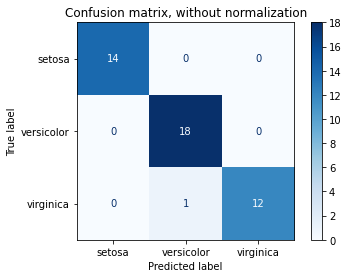

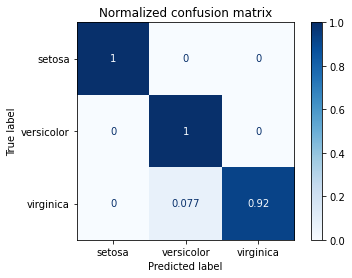

In [69]:
#We can also plot the confusion matrices both with and without normalization using the plot_confusion_matrix function of sklearn 
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=class_names, # The various class names
                                 cmap=plt.cm.Blues, # The colour of the plotted matrix
                                 normalize=normalize # Takes values 'true' or None for normalized matrix and non-normalized matrix
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Another classifier we will look at is the Support Vector Machine or SVM. It is another supervised learning algorithm that analyses data for both classification and regression analysis.
An SVM model is basically a representation of different classes in a hyperplane in multidimensional space. The hyperplane will be generated in an iterative manner by SVM so that the error can be minimized. The goal of SVM is to divide the datasets into classes to find a maximum marginal hyperplane.
Support vectors, hyperplanes and margins. Datapoints closest to the hyperplane are called support vectors, the hyperplane is the decision plane dividing different classes whereas the margin is the perpendicular distance from the line to the support vectors.
The logic of the algorithm is simple, it divides datasets into different classes to find the maximum marginal hyperplane, it does so by generating hyperplanes that segregate classes in the best way, and then it chooses the best hyperplane possible.



SVM Kernels-
The algorithm is implemented with kernels that transform input data space into the required higher dimensional data space.
There are different types of kernels - Linear kernels, polynomial kernels, radial basis function kernels etc.


Documentations for implementing SVM classifier [svm.LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html) [svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

Great Articles for studying SVMs - [Towards-Data-Science](https://towardsdatascience.com/support-vector-machines-soft-margin-formulation-and-kernel-trick-4c9729dc8efe#:~:text=Soft%20Margin%20Formulation%20This%20idea%20is%20based%20on,done%20simply%20by%20modifying%20the%20objective%20of%20SVM.)

In [ ]:
# SVM classifiers tend to do very well on problems with too many features
X_new = iris.data[:,:2] #Only taking 2 features instead of 4 using slicing so we take all rows with only the first two columns
y = iris.target
C=1.0 
''' C is the SVM regularization pameter. The strength of the regularization is inversely proportional to C 
C controls the cost of misclassification on the training data and the bias variance trade-off on the dataset 
A small value of C lowers the cost of misclassification and results in a "soft-margin" whereas a large value of C decreases the margin which results in a hyperplane that
overfits the dataset, this is called "hard-margin" which means that we found a maximal margin hyperplane which divides two classes such that the distance between them is as large as possible.

THEREFORE - Low C results in HIGH Bias and LOW Variance - Underfit & Large C results in LOW Bias and HIGH Variance - Overfit '''
scores=[]
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))


# These are all the different types of kernels - linear, polynomial and radial basis function
# NOTE- There is a difference between svm.SVC(kernel='linear') and svm.LinearSVC as can be seen from their accuracy scores
# One of the differences is that LinearSVC uses the One-vs-All (also known as One-vs-Rest) multiclass reduction while svm.SVC uses the One-vs-One multiclass reduction.
# Additionally, for multiclass reduction, svm.SVC fits N*(N-1)/2 models where N is the number of classes, whereas LinearSVC fits only N models since it uses One vs All multiclass reduction.
for clf in models:
  clf.fit(X_new,y)
  scores.append(clf.score(X_new,y))
print("Training Accuracies : ",scores)

Training Accuracies :  [0.82, 0.8, 0.8266666666666667, 0.8133333333333334]


For more details regarding differences - [Q&A](https://www.researchgate.net/post/Diffference_between_SVM_Linear_polynmial_and_RBF_kernel)

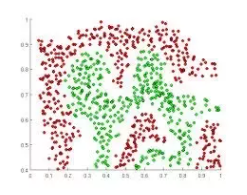

Use of Gamma Hyperparameter in SVM kernels - This parameter is used for non-linear kernels -  Radial Basis Function kernels, Sigmoid kernels, and Polynomial kernels of degree 3 and above.
The main role of this parameter is to handle non-linear classification.
If datapoints from 2 different categories are not separable in 2D as in the above image, we will have to transform them to a higher dimension. If we were to transform 2D data to a higher dimension, let's say 3D, we would have to project the peaks of the datapoints along the z-axis, gamma here merely controls the shape of the peaks.

A large value of gamma results in a pointed peak whereas a low value of gamma gives us a softer and broader bump on our peaks.

In [ ]:
# Since it is often very difficult to choose the appropriate hyperparameters for our classifiers we will be using a function called GridSearchCV in scikit-learn
from sklearn.model_selection import GridSearchCV
hyperparameters = {'kernel':['linear','rbf','poly'],'gamma':[1e-3,1e-4],'C':[1,10,100,1000]}
model = GridSearchCV(svm.SVC(),hyperparameters) # We provide the hyperparameters as a python dictionary to GridSearch which selects the best hyperparameters and provides the best accuracy
model.fit(X_train,y_train)
preds = model.predict(X_test)
print(model.best_params_) # We can print the best values of the hyperparameters for training the classifier for the best accuracy
print("Accuracy is:", accuracy_score(preds,y_test))

{'C': 1, 'gamma': 0.001, 'kernel': 'linear'}
Accuracy is: 0.9555555555555556


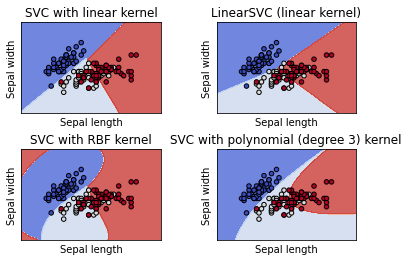

In [ ]:
# Plotting the decision boundary of each SVM classifier 
X_new = iris.data[:,:2]

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out



C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
models = (clf.fit(X_new, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X_new[:, 0], X_new[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

Some Differences between K-Nearest Neighbours and Support Vector Machines - 

**ADVANTAGES OF KNN** - 
It is automatically non-linear and can easily detect linear or non linear data distributions.


**DISADVANTAGES OF KNN** -  

*   It is very hard to fine tune the value of K along with the distance to be used (L2 norm or L1 norm).

*   In addition to this, KNN is very sensitive to bad features which means that we need to take extra precautions when doing when selecting features.

*   KNN is also very sensitive to outliers and we have to take precautions to remove outliers in the dataset before using this algorithm.


**ADVANTAGES OF SVM** - 

* It can be used in both linear and non linear ways with the help of a kernel.

* It is very useful for complex non-linear datasets because it is able to find the linear separation (Maximal Marginal Hyperplane) between the classes easily.

* SVM is better at dealing with outliers since it only considers the most relevant points to find a hyperplane, these points are called the support vectors and are the points closest to the hyperplane.

**DISADVANTAGES OF SVM** - SVMs need to be tuned, and the regularization parameter C, along with the use of the different types of kernels and their parameters is critical.

**When to use which algorithm ?** 
Generally speaking, we should use KNN when provided with a lot of datapoints in a low dimensional space.
However, if we are provided with a lot of datapoints in a high dimensional space, we should always go for SVM over KNN.
If we are presented with an unpredictable situation, we should probably choose an SVM with an RBF kernel since it is useful for both linearly separable and non-linearly separable datasets.





We will now have a look at Logistic Regression which is another algorithm that is used for classification problems.
It can be of three types - Binary, Multinomial or Ordinal.
Binary can only differentiate between two class labels - 0 or 1, 
Multinomial can differentiate between multiple categories without ordering,
Ordinal can differentiate between multiple categories with ordering, for example - Movie rating from 1 to 10.
Here is the documentation of the algorithm [sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lreg = LogisticRegression(random_state=0,max_iter=1000,multi_class='auto').fit(X_train,y_train) # Multi class = "auto" by default and will carry out multinomial logistic regression in this case since we have 3 categories 
# Training the model with hyperparameter random_state = 0 We usually set this to 0 when using the lbfgs solver. we usually use a non-zero value when our solver is 'saga','sag' or 'liblinear'
y_pred_lreg = lreg.predict(X_test)
print(accuracy_score(y_test,y_pred_lreg))

0.9333333333333333


Please go ahead and read this article on the differences between Logistic Regression and Support Vector Machines [LogisticRegression vs SVM](https://medium.com/axum-labs/logistic-regression-vs-support-vector-machines-svm-c335610a3d16#:~:text=SVM%20tries%20to%20finds%20the%20%E2%80%9Cbest%E2%80%9D%20margin%20%28distance,different%20weights%20that%20are%20near%20the%20optimal%20point.)

Now that we have knowledge of classification algorithms we will be doing a project called MNIST handwritten digit recognition 
We are provided with a csv file that contains regarding the pixels of each handwritten digit - These are either 0 or 1

In [9]:
path = "/content/sample_data/mnist_train_small.csv"
mnist_train = pd.read_csv(path)
mnist_train.head()

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.551,0.552,0.553,0.554,0.555,0.556,0.557,0.558,0.559,0.560,0.561,0.562,0.563,0.564,0.565,0.566,0.567,0.568,0.569,0.570,0.571,0.572,0.573,0.574,0.575,0.576,0.577,0.578,0.579,0.580,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
mnist_train['label'] = mnist_train['6']
del mnist_train['6']

In [11]:
mnist_train.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,...,0.552,0.553,0.554,0.555,0.556,0.557,0.558,0.559,0.560,0.561,0.562,0.563,0.564,0.565,0.566,0.567,0.568,0.569,0.570,0.571,0.572,0.573,0.574,0.575,0.576,0.577,0.578,0.579,0.580,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590,label
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


In [12]:
path_test = '/content/sample_data/mnist_test.csv'
mnist_test = pd.read_csv(path_test)
mnist_test.head()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.628,0.629,0.630,0.631,0.632,0.633,0.634,0.635,0.636,0.637,0.638,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648,0.649,0.650,0.651,0.652,0.653,0.654,0.655,0.656,0.657,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
mnist_test['label'] = mnist_test['7']
del mnist_test['7']

In [14]:
mnist_test.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,...,0.629,0.630,0.631,0.632,0.633,0.634,0.635,0.636,0.637,0.638,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648,0.649,0.650,0.651,0.652,0.653,0.654,0.655,0.656,0.657,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667,label
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [15]:
mnist_train.isnull().sum().head(10) # Searching for null values in the dataset

0      0
0.1    0
0.2    0
0.3    0
0.4    0
0.5    0
0.6    0
0.7    0
0.8    0
0.9    0
dtype: int64

In [16]:
mnist_test.isnull().sum().head(10) # Searching for null values in the dataset

0      0
0.1    0
0.2    0
0.3    0
0.4    0
0.5    0
0.6    0
0.7    0
0.8    0
0.9    0
dtype: int64

In [17]:
# These are the categories - digits from 0 to 9 
labels = list(np.sort(mnist_train['label'].unique()))
print(labels)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


Text(0.5, 1.0, 'Digit 5')

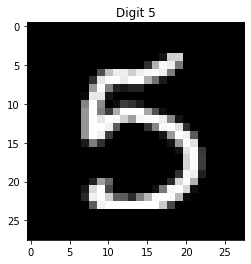

In [19]:
five = mnist_train.iloc[3,:-1]
five = five.values.reshape(28,28)
plt.imshow(five,cmap='gray')
plt.title('Digit 5')

In [20]:
round(mnist_train.drop('label',axis=1).mean(),2)

0        0.00
0.1      0.00
0.2      0.00
0.3      0.00
0.4      0.00
         ... 
0.586    0.01
0.587    0.00
0.588    0.00
0.589    0.00
0.590    0.00
Length: 784, dtype: float64

In [38]:
y = mnist_train['label']
X = mnist_train.drop(columns='label')
print(X.shape)

(19999, 784)


In [39]:
print(mnist_test['label'])

0       2
1       1
2       0
3       4
4       1
       ..
9994    2
9995    3
9996    4
9997    5
9998    6
Name: label, Length: 9999, dtype: int64


In [40]:
y_true = mnist_test['label']
X_testSet = mnist_test.drop(columns='label')
X_testSet.shape
print(y_true)

0       2
1       1
2       0
3       4
4       1
       ..
9994    2
9995    3
9996    4
9997    5
9998    6
Name: label, Length: 9999, dtype: int64


In [41]:
# We normalize the dataset by dividing it by 255.0
# Since pixels are always between 0 and 255, and it is always faster for our algorithm to normalize these values - between [0 and 1]
X = X/255.0
X_testSet = X_testSet/255.0

In [47]:
# We now scale the features using sklearn.preprocessing.scale
from sklearn.preprocessing import scale # This creates a matrix with 0 mean and unit variance
X_scale = scale(X)
X_testSet = scale(X_testSet)
X_train,X_test,y_train,y_test = train_test_split(X_scale,y,test_size=0.3,random_state=10)

In [43]:
model = svm.SVC(kernel='rbf',C=1.0,gamma=0.001)
model.fit(X_train,y_train)
y_preds = model.predict(X_test)

In [48]:
y_final_preds = model.predict(X_testSet)

In [ ]:
print(y_final_preds)

[2 1 0 ... 4 5 6]


In [ ]:
print(y_true)

0       2
1       1
2       0
3       4
4       1
       ..
9994    2
9995    3
9996    4
9997    5
9998    6
Name: label, Length: 9999, dtype: int64


In [45]:
print("Accuracy:", accuracy_score(y_test,y_preds))
#This is the cross validation accuracy of the model

Accuracy: 0.9428333333333333


In [49]:
print("Accuracy:", accuracy_score(y_true,y_final_preds))
#This is the accuracy of the model on the test set

Accuracy: 0.9454945494549455


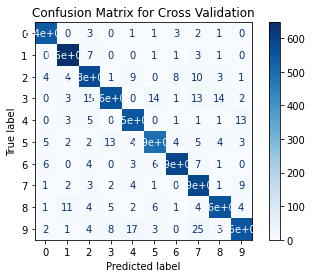

In [ ]:
title = "Confusion Matrix for Cross Validation"
disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=labels, # The various class names
                                 cmap=plt.cm.Blues, # The colour of the plotted matrix
                                 normalize=None) # Takes values 'true' or None for normalized matrix and non-normalized matrix)
disp.ax_.set_title(title)
plt.show()

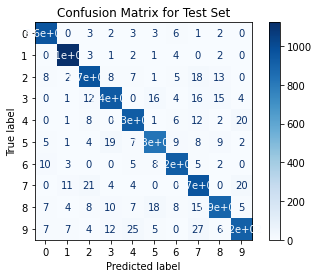

In [ ]:
title = "Confusion Matrix for Test Set"
display = plot_confusion_matrix(model, X_testSet, y_true,
                                 display_labels=labels, # The various class names
                                 cmap=plt.cm.Blues, # The colour of the plotted matrix
                                 normalize=None) # Takes values 'true' or None for normalized matrix and non-normalized matrix)
display.ax_.set_title(title)
plt.show()

Now we will be practising linear regression on the california houses dataset.
Linear regression is an algorithm useful for finding linear relationship between the response variable and one or more independent variables.

Since this is regression, the target variable or the response variable will be continuous instead of categorical.

The mathematical equation is something like 
y = w1*x1 + w2*x2 + w3*x3 + ... wn*xn + b
Where y is the dependent variable and x1,x2,...,xn are the independent variables. The aim of Linear Regression is to minimize the residual sum of squares between the observed targets in the dataset and the targets predicted by linear approximation.
The documentation for [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

The most common metrics include Mean Squared Error and Root Mean Squared Error

In [ ]:
cali_houses_train = pd.read_csv('/content/sample_data/california_housing_train.csv')

In [ ]:
cali_houses_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
cali_houses_test = pd.read_csv('/content/sample_data/california_housing_test.csv')

In [ ]:
cali_houses_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [ ]:
y = cali_houses_train['median_house_value']
X = cali_houses_train.drop(columns='median_house_value') 
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250


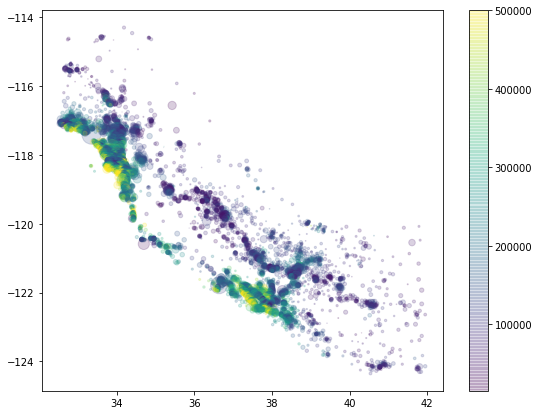

In [ ]:
plt.figure(figsize=(9,7))
plt.scatter(cali_houses_train.latitude,cali_houses_train.longitude,alpha=0.2,c=cali_houses_train.median_house_value,s=cali_houses_train.population/100)
plt.colorbar()

In [ ]:
cali_houses_train.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
coeff = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficients'])

In [ ]:
coeff

,Coefficients
longitude,-43139.637258
latitude,-42925.673088
housing_median_age,1150.694932
total_rooms,-8.378251
total_bedrooms,117.648543
population,-38.488772
households,45.436003
median_income,40507.068359


By looking at the coefficients in the dataframe above, we can actually conclude that median income is the most important variable for determining mean house value since it has the highest coefficient.

In [ ]:
y_test_lr = cali_houses_test['median_house_value']
X_test_lr = cali_houses_test.drop(columns='median_house_value')

In [ ]:
y_test_lr.shape

(3000,)

In [ ]:
X_test_lr.shape

(3000, 8)

In [ ]:
predictions_lr = lr.predict(X_test_lr)

In [ ]:
X_test_lr['median_income'].shape == predictions_lr.shape

True

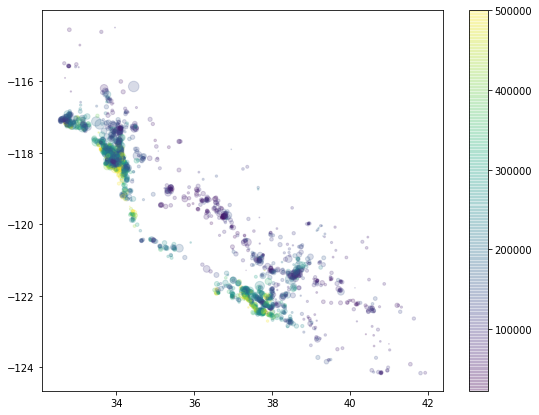

In [ ]:
plt.figure(figsize=(9,7))
#plt.plot(X_test_lr['median_income'],predictions_lr)
plt.scatter(cali_houses_test.latitude,cali_houses_test.longitude,alpha=0.2,c=cali_houses_test.median_house_value,s=cali_houses_test.population/100)
plt.colorbar()

In [ ]:
print("Root Mean Squared Error:",np.sqrt(sklearn.metrics.mean_squared_error(y_test_lr,predictions_lr)))

Root Mean Squared Error: 69765.36022216761


The mean squared error is the average of the squares of the difference between the values estimated/predicted by the model and the actual values.
Here we have used Root Mean Squared Error as the metric which is simply the square root of the mean squared error.

We will now look at Preprocessing using scikit-learn.
Data preprocessing is something that is useful for getting rid of outliers in the dataset and learning algorithms benefit from it.

In [2]:
from sklearn import preprocessing 
matrix = np.array([[ 1., -1.,  2.],[ 2.,  0.,  0.],[ 0.,  1., -1.]])
matrix_scaled = preprocessing.scale(matrix)
print(matrix_scaled.mean(axis=0))
print(matrix_scaled.std(axis=0))
# As we already did this before, Using sklearn.preprocessing.scale is important in scaling a dataset so we get one with a mean of 0 and unit variance

[0. 0. 0.]
[1. 1. 1.]


Using preprocessing in sklearn we can scale features to a range as well.
We do this using the MinMaxScaler

In [ ]:
# This helps us to scale a data matrix to the range [0,1]
X_example = np.array([[ 1., -1.,  2.],[ 2.,  0.,  0.],[ 0.,  1., -1.]])
min_max_scaler = preprocessing.MinMaxScaler()
X_min_max = min_max_scaler.fit_transform(X_example)
X_min_max

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

sklearn preprocessing is also useful for encoding categorical features
There are two common ways to encode categorical features - 
We can either use OneHotEncoder for unordered data or an OrdinalEncoder for ordered data.

In [3]:
dictionary = {'Shape':['Square','Square','Triangle','Circle'],'Class':['second','third','first','third'],'Size':['S','L','M','XL']}
df = pd.DataFrame(dictionary)
# This is just a sample dataset created to encode categorical features
# Here Shape is unordered, Class and Size are ordered 
df

,Shape,Class,Size
0,Square,second,S
1,Square,third,L
2,Triangle,first,M
3,Circle,third,XL


In [4]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
one = OneHotEncoder(sparse=False)
one.fit_transform(df[['Shape']])

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

It arranged them in an alphabetical order from left to right 
Column 0 represents Circle, Column 1 represents Square, Column 2 represents Triangle

In [ ]:
ordinal = OrdinalEncoder(categories=[['first','second','third'],['S','M','L','XL']])
ordinal.fit_transform(df[['Class','Size']])

array([[1., 0.],
       [2., 2.],
       [0., 1.],
       [2., 3.]])

Here, Column 0 represents the Class and Column 1 represents the Size 

In Column 0, 0 represents first, 1 represents second , 2 represents third, just according to the order in which we provide it.

Similarly, in Column 1, 0 represents S, 1 represents M, 2 represents L, 3 represents XL

Scikit-Learn allows us to use ColumnTransformers to apply different preprocessing to different columns

In [6]:
d = {"Fare":[3.45,2.34,5.67,9.06,7.89,8.76],"Sex":['Male','Female','Male','Female','Male','Female'],'Age':[27,34,45,26,25,np.nan]}
df_new = pd.DataFrame(d)
df_new

,Fare,Sex,Age
0,3.45,Male,27.0
1,2.34,Female,34.0
2,5.67,Male,45.0
3,9.06,Female,26.0
4,7.89,Male,25.0
5,8.76,Female,NaN


In [7]:
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
ohe = OneHotEncoder()
imp = SimpleImputer()
ct = make_column_transformer(
    (ohe, ['Sex']),
    (imp, ['Age']),
    remainder = 'passthrough') # This value of the remainder parameter doesn't transform any of the columns not mentioned but just allows them to be unchanged in the transformed matrix

In [8]:
ct.fit_transform(df_new)

array([[ 0.  ,  1.  , 27.  ,  3.45],
       [ 1.  ,  0.  , 34.  ,  2.34],
       [ 0.  ,  1.  , 45.  ,  5.67],
       [ 1.  ,  0.  , 26.  ,  9.06],
       [ 0.  ,  1.  , 25.  ,  7.89],
       [ 1.  ,  0.  , 31.4 ,  8.76]])

As can be seen in the transformed matrix, the first two columns belong to one hot encoded sex column whereas the third column contains the imputed value for the missing age.

ColumnTransformer allows us to apply both methods (one hot encodings and imputations) simultaneously 

Q. What to do when we are faced with an unknown category that we haven't seen before in the training set ? 

A. We can actually use OneHotEncoder to encode that category to 0, this is often the case when we train our models on a bunch of categories and are faced with new ones in the test set.

In [53]:
data = {"column":['A','B','C','B']}
df_data = pd.DataFrame(data)
df_data

,column
0,A
1,B
2,C
3,B


In [55]:
ohe_new = OneHotEncoder(sparse=False,handle_unknown='ignore')
ohe_new.fit_transform(df_data[['column']])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [56]:
data_new = {'column':['A','B','C','D']}
df_data_new = pd.DataFrame(data_new)
df_data_new

,column
0,A
1,B
2,C
3,D


In [57]:
ohe_new.transform(df_data_new[['column']])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 0.]])

As you can see the final row for D is encoded as 0 since we used handle_unkown = 'ignore' parameter for one hot encoding

A few Scikit-learn tips -

1. Differences between 'fit' and 'transform' methods -
Using the 'fit' method, the transformer learns something about the data whereas when using 'transform' the transformer uses what it learnt to do the data transformation.
For example - StandardScaler() is a transformer that learns the mean and scale of each feature when 'fit' is called. Calling 'transform' standardizes the features using mean and scale.

2. We should try to use "fit_transform" on training data but "transform" only on test data or new data(data for which we don't have information regarding labels). "fit_transform" runs a fit and a transform and is more computationally efficient than running fit and transform separately.

3. We should always use a random state when dividing data using train_test_split.

4. We should try to use sklearn instead of pandas for Machine Learning preprocessing 